# 2025-2, PHYS312 Computational Physics, Homework 1


## Problem 1
In mathematics, the Fibonacci numbers $F_n$ form a sequence, called the Fibonacci sequence, such that each number is the sum of the two preceding ones. They are defined as
\begin{align}
  F_0 &= 0 \\
  F_1 &= 1 \\
\end{align}
and
$$
  F_n = F_{n-1} + F_{n-2}
$$
for $n>1$.

(a) Write a code using python built-in data types, loops, and operations to calculate and print the Fibonacci sequence up to an arbitrary number $n$. Print the sequence up to $F_{10}$, i.e., [F_0, F_1, ..., F_{10}]. (10/10 pts)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def fib_1(n):
    if n == 0: return [0]
    if n == 1: return [0, 1]
    se = [0, 1]
    for i in range(2, n + 1):
        se.append(se[i-1] + se[i-2])
    return se

print(fib_1(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


(b) Write a code that has the same purpose, but using recursion this time, and print out the result. (10/10 pts)


In [25]:
def fib_2(n):
    if n == 0: return [0]
    elif n == 1: return [0, 1]
    else:
        se = fib_2(n-1)
        se.append(se[-1] + se[-2])
        return se

print(fib_2(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]



(c) Calculate $F_{10}$ using both methods and use the %%timeit method to compare the time taken between the two methods, without the print function. Repeat for $F_{20}$. Which method is faster and by how many factors? (10/10 pts)

In [26]:
# %timeit fib_1(10)
# %timeit fib_2(10)
# %timeit fib_1(20)
# %timeit fib_2(20)

# fib_1 is faster than fib_2 at both size
# (1) n=10: fib_1 is 2.76 times faster than fib_2
# (2) n=20: fib_1 is 3.1 times faster than fib_2

## Problem 2
Compute the following integrals (do not use integration packages such as scipy).

(a) $\int_0^2dx (x^4 - 2x+1)$ using Trapezoidal rule and Simpson's rule using an appropriate number of divisions between the integration limits. (10/10 pts)

In [ ]:



def simp(func, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = func(x)
    return (h/3) * (y[0] + y[-1] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]))




4.4
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1  1.12
 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38 1.4
 1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68
 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96
 1.98]
[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1  1.12
 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38 1.4
 1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68
 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.

In [39]:
def TrapezoidalRule(f, a, b, N):
  h = (b-a)/N
  points = np.arange(a+h, b, h)
  sum = np.sum([f(point) for point in points])
  return h*(0.5 * f(a) + 0.5 * f(b) + sum)

 

def SimpsonsRule(f, a, b, Nh):
  N = 2*Nh
  h = (b-a)/N
  odds  = np.arange(a + h, b, 2 * h)
  evens = np.arange(a + 2 * h, b, 2 * h)
  sum_odd = np.sum([f(odd) for odd in odds])
  sum_even = np.sum([f(even) for even in evens])
  return h * ( f(a) + f(b) + 4 * sum_odd + 2 * sum_even)/3

N = 100
print(TrapezoidalRule(f,0,2,N))
print(SimpsonsRule(f,0,2,N//2))


4.401066656
4.400000042666664


(b) For both methods, plot the integration error as a function of the number of divisions between the integration limits, on a log-log scale using the plt.loglog function (you may see some spikes). Confirm the error scaling of both methods. (7/10 pts) comment : spike가 보이지 않습니다.

110
220
880
True
99.0
99.0


ValueError: operands could not be broadcast together with shapes (109,) (110,) 

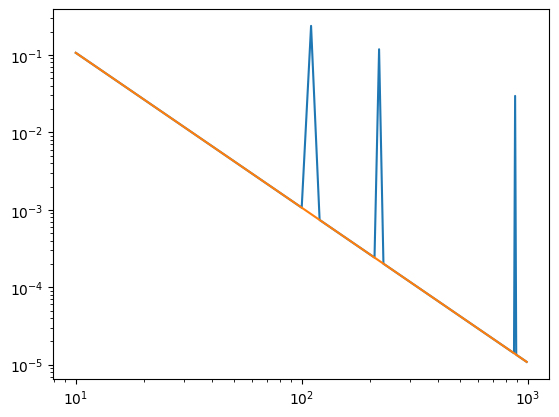

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 2*x + 1

def trap(func, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N + 1)
    y = func(x)
    return h * (0.5*y[0] + 0.5*f(b) + np.sum(y[1:-1])), x

def TrapezoidalRule(f, a, b, N):
  h = (b-a)/N
  points = np.arange(a+h, b, h)
  sum = np.sum([f(point) for point in points])
  return h*(0.5 * f(a) + 0.5 * f(b) + sum), points

N_arr = np.arange(10,1000,10)
err_trap = []
err_Trap = []
true_value = 4.4
for n in N_arr:
  v1, _ = trap(f, 0, 2, n)
  v2, _ = TrapezoidalRule(f,0,2,n)
  err_trap.append(v1 - true_value)
  err_Trap.append(v2-true_value)
  
  if v1 != v2:
     print(n)  # n is 110, 220, 880

plt.loglog(N_arr,np.array(err_Trap))
plt.loglog(N_arr, np.array(err_trap))


# Test about many case N ≠ 110, 220, 880
_, domain_1 = trap(f, 0, 2, 100)
_, domain_2 = TrapezoidalRule(f,0,2,100)
print(np.allclose(domain_1[1:-1], domain_2)) # true
print(np.sum(domain_1[1:-1])) # 989.0
print(np.sum([point for point in domain_2])) # 989.0

# Test about many case N = 110, 220, 880  -> 무한소수 발생지점
_, domain_1 = trap(f, 0, 2, 110)
_, domain_2 = TrapezoidalRule(f,0,2,110)
print(np.allclose(domain_1[1:-1], domain_2)) # ValueError: operands could not be broadcast together with shapes (109,) (110,)
print(np.sum(domain_1[1:-1])) # 989.0
print(np.sum([point for point in domain_2])) # 989.0



(c) $\int_0^1 \int_0^1 \frac{dxdy }{(x^2+y^2+1)^{3/2}}$ using Trapezoidal rule [hint: the exact solution is $\pi/6$] (10/10 pts).

The general 2D trapezoidal rule is defined in rectangular domain so I will devide the domain space as [0,1] x [0,1] uniform subdivision first and use below equation

$I \;\approx\; h_x h_y \sum_{j=0}^n \sum_{k=0}^m w_{j,k} \, f(x_j, y_k),$

where value of $w_{j,k}$ is 1 in interior point in uniform subdivision but $w_{j,k}$ = 0.5 at edge points and $w_{j,k}$ = 0.25 at four corners

In [30]:
answer = np.pi/6
ax=0
bx=1
ay=0
by=1
N=1000

def f_2(x, y):
    return (x**2 + y**2 + 1)**(-3/2)

def trap2d(func, ax, bx, ay, by, N):
    hx = (bx-ax)/N
    hy = (by-ay)/N
    x = np.linspace(ax, bx, N+1)
    y = np.linspace(ay, by, N+1)
    sum = 0
    for i in range(N + 1):
        for j in range(N + 1):
            if (i==0 or i==N) and (j==0 or j==N):
                weight = 0.25
            elif i==0 or i==N or j==0 or j==N:
                weight = 0.5
            else:
                weight = 1
            sum += weight * func(x[i], y[j])

    return sum*hx*hy

print(answer)
print(trap2d(f_2, ax, bx, ay, by, N))

0.5235987755982988
0.5235987114482511


## Problem 3

A prime number is a number whose factors are 1 and itself.

(a) One way to check whether a number $N$ is prime is to divide by all numbers from 2 to $N-1$ and check whether there is a remainder for all cases. Write a code that implements this algorithm. Print a list of all primes up to 10,000. [hint: use "break"] (10/10 pts)

In [31]:
def brute_force():
    primes = []
    for i in range(2, 10001):
        is_prime = True
        for j in range(2,i):
            if i%j == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(i)
    return primes

print(brute_force())

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12

(b) The algorithm can be vastly sped up by making use of the following observations:
1. A number $N$ is prime if it has no prime factors less than $N$. Hence we only need to check if it is divisible by other primes.
2. If a number $N$ is non-prime, having a factor $r$, then $N=rs$, where $s$ is also a factor. If $r\geq \sqrt{N}$ then $N=rs\geq s \sqrt{N}$, which implies that $s\leq \sqrt{N}$. In other words, any non-prime must have factors, and hence also prime factors, less than or equal to $\sqrt{N}$. Thus to determine if a number is prime we have to check its prime factors only up to and including $\sqrt{N}$. If there are none then the number is prime.
3. If we find even a single prime factor less than $\sqrt{N}$ then we know that the number is non-prime, and hence there is no need to check any further---we can abandon this number and move on to something else.

Write a code that implements this improved algorithm and, again, print a list of all primes up to 10,000. Measure the time taken to run this code using %%timeit (without the print function), and compare the result with the code in (a). By how many times is the improved code faster? (30/30 pts)

In [32]:
import math

def early_stop():
    primes = []
    for n in range(2,10001):
        is_prime = True
        limit = int(math.sqrt(n))
        for d in range(2, limit + 1):
            if n%d == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(n)
    return primes

print(early_stop())
%timeit brute_force()
%timeit early_stop()
# Improved algorithm is 37.24 times faster than brute_force

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 12